In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import tensorflow
import sklearn

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM,Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
fake=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Fake.csv')

In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


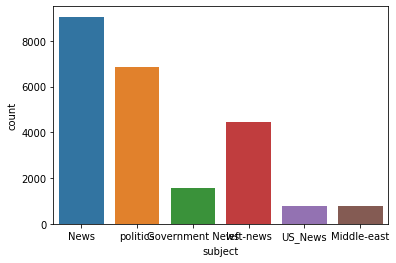

In [8]:
sns.countplot("subject",data=fake)

In [9]:
## wordcloud

text=" ".join(fake["text"].tolist( ))

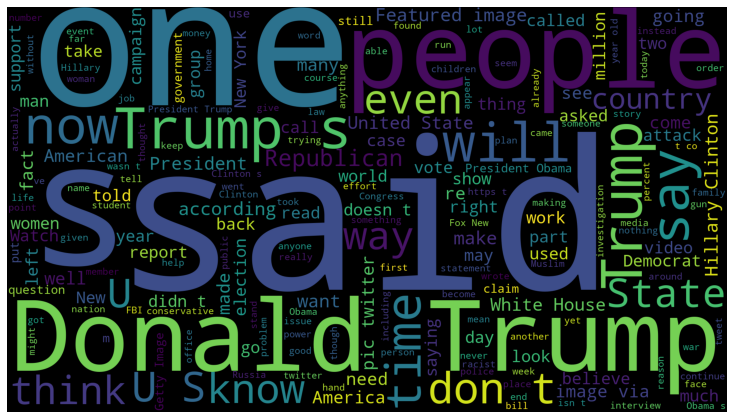

In [10]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
#real data

In [12]:
real=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/True.csv')

In [32]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [33]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [34]:
## wordcloud

text=" ".join(real["text"].tolist( ))

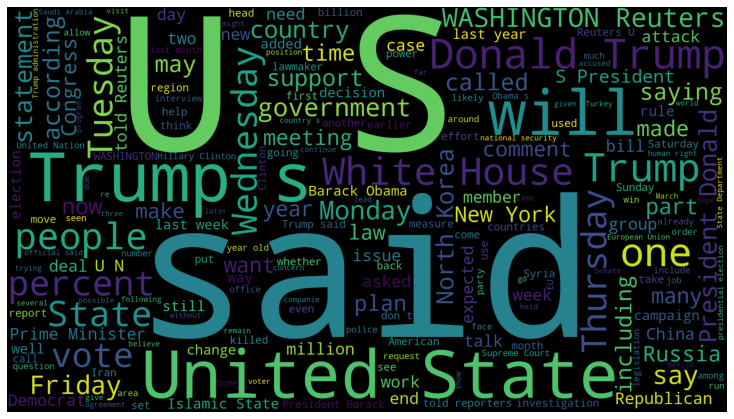

In [35]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [36]:
real.sample(5)

,title,text,subject,date
7662,Most Republicans believe Russia is meddling in...,WASHINGTON (Reuters) - Most Republicans believ...,politicsNews,"October 28, 2016"
2710,Trump says Iran complying with nuclear deal bu...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"July 18, 2017"
2373,Trump 'weighed in' on son's Russia attorney st...,WASHINGTON (Reuters) - The White House said on...,politicsNews,"August 1, 2017"
8745,White House hopeful Trump nears end of vice pr...,WASHINGTON (Reuters) - Republican Donald Trump...,politicsNews,"July 13, 2016"
12467,"Poland's new PM voices backing for nuclear, gr...",WARSAW (Reuters) - Poland will remain reliant ...,worldnews,"December 12, 2017"


In [51]:
unknown_publishers=[]
for index, row in enumerate(real.text.values):
  try: 
    record = row.split('-',maxsplit=1)
    record[1]
    assert(len(record[0])<120)

    
    
  except:
      unknown_publishers.append(index)


In [52]:
len(unknown_publishers)

221

In [62]:
real.loc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20134    MEXICO CITY (Reuters) - At least 13 people wer...
20499    LONDON (Reuters) - Two men arrested on suspici...
20666    SINGAPORE (Reuters) - Police in Singapore have...
21245    CARACAS (Reuters) - Venezuela accused France o...
21338    BRATISLAVA (Reuters) - Slovak government leade...
Name: text, Length: 221, dtype: object

In [63]:
real.iloc[8970]

title      Milestones in legal fight over Texas abortion law
text       (Reuters) - The U.S. Supreme Court is set to r...
subject                                         politicsNews
date                                          June 26, 2016 
Name: 8971, dtype: object

In [66]:
publisher=[]
tmp_text=[]


for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append("unknown")

  else:
    record=row.split('-',maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [67]:
real["publisher"]=publisher
real["text"]=tmp_text

In [68]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [69]:
real.shape

(21416, 5)

In [71]:
empty_fake_index= [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [72]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [73]:
real["text"]=real["title"]+ " " +real["text"]
fake["text"]=fake["title"]+ " " +fake["text"]

In [74]:
real["text"]=real["text"].apply(lambda x: str(x).lower())
fake["text"]=fake["text"].apply(lambda x: str(x).lower())

In [75]:
real["class"]=1
fake["class"]=0

In [76]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [77]:
real= real[["text","class"]]
fake= fake[["text","class"]]

In [78]:
data= real.append(fake,ignore_index=True)

In [80]:
data.sample(5)

,text,class
28700,pope francis just infuriated conservatives by...,0
37289,illegal alien with drug resistant tb to be rel...,0
38448,fbi says dem presidential frontrunner hillary ...,0
44336,members: ep #5 – drive by wire: ‘taxi to the u...,0
20350,ruling nationals recover support in jittery ne...,1


In [82]:
data["text"]=data["text"].apply(lambda x: ps.remove_special_chars(x))

NameError: ignored